In [1]:
from IPython.display import Image

<h1>¿Qué es la fase de la portadora (carrier)?</h1>

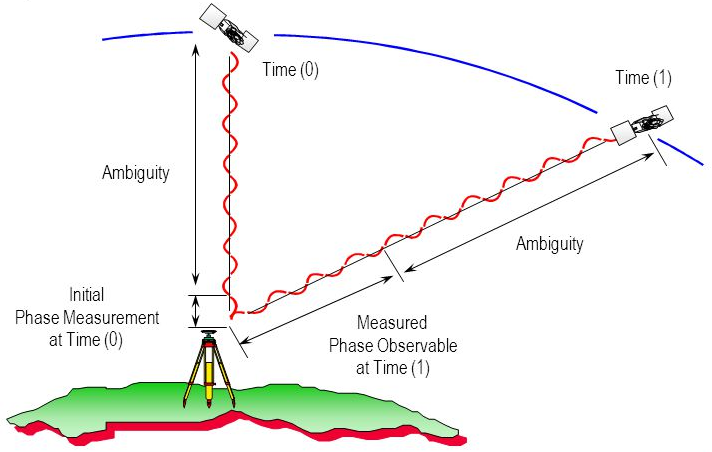

In [2]:
Image("fase_ambiguedad.png")

Tenemos 2 medidas a partir de las cuales podemos obtener pseudo-rangos : Código y Portadora (carrier). La información del código junto con los mensajes de navegación son modulados en la señal portadora, esto se hace en las frecuencias L1 y L2 en GPS, también existen otras frecuencias nuevas.

## Código 

El código tiene la información del tiempo desde que se emite la señal hasta que alcanza  al receptor. Es más más disperso (contiene ruido) y en general es menos preciso para estimar la posición. Podemos definir la pseudodistancia que se deriva del código: 

$P(T) = c \bigtriangleup T = c [t_{rec}(T)-t_{sat}(T-\bigtriangleup T)] $



## Portadora 

Es la señal usada para aplicaciones que requieren más precisión en la posición (error de posición por debajo de centímetros) sin embargo tiene el problema de la ambiguedad. Quiere decir aunque podemos ver la señal y sabemos que se repite cada cierto numero de ciclos no sabemos su **fase inicial**. Por lo tanto las observaciones realizadas con la portadora son más precisas pero ambiguas. 

$\phi_{L}(T) = \phi_{Lrec}(T)-\phi_{L}^{sat}(T - \bigtriangleup \tilde{T}) $

$= \frac{c}{\lambda}\bigtriangleup \tilde{T} + N $ 

N es la ambiguedad.

$L_{1} = \lambda_{1}\phi_{L1}$

$L_{2} = \lambda_{2}\phi_{L2}$  

L1 y L2 Seran los pseudorangos medidos por la fase con amiguedad en las dos frecuencias.

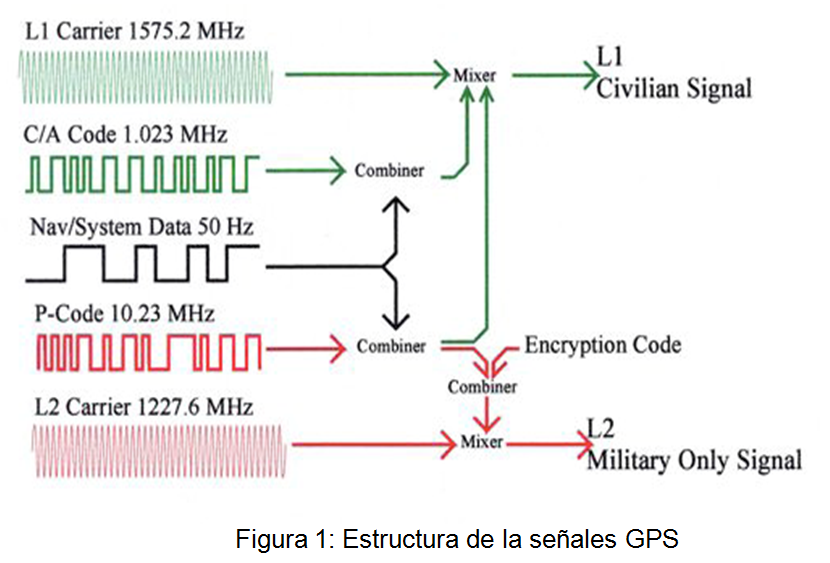

In [3]:
Image("codigo_portadora_senal.png")

## Fase

De la señal portadora nos queda un número que correspondería al número de ciclos que da la señal desde su emisión a su recepción, la fase es el ángulo de rotación. Medido usualmente en "ciclos"  en GPS. Nos da una medición del tiempo pues fase y tiempo estan muy relacionados.


$T (t) = k(\varphi (t) - \varphi_{0})$

Tiempo según nuestro reloj en tiempo t

k es constante de calibración,  ciclos --> segundos

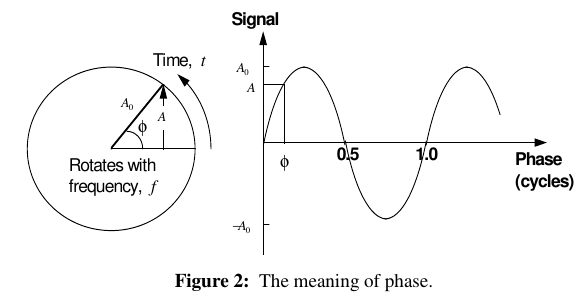

In [4]:
Image(filename='phase_bewitt.png')

## Origen de la ambiguedad de Fase

Si tenemos la fase completa podemos sumar un numero entero de ciclos a la fase y obtendríamos la misma señal. 

Suponiendo que registramos una fracción de la fase en la primera medición no tendríamos manera de saber que entero N añadir a la fase recibida por el receptor para que realmente sea igual a la diferencia de fase entre la réplica y la enviada por GPS. No tenemos medida directa de la fase completa de la señal entrante de GPS ***** .

$\Phi + N = \varphi_{R} - \varphi_{G}$  (1)

$\Phi$ : fase real registrada por el receptor

N puede ser modelada como la misma constante desconocida por todas las  medidas.

**Observable de Portadora-fase**


El tiempo de reloj se puede escribir como una función de la fase y la frecuencia.

$T(t) =\frac{\varphi (t) - \varphi_{0}}{f_{0}} $

$\varphi(t) = f_{0}T + \varphi_{0}$

y sustituyendo en (1)

$\Phi^{S}(t) = f_{0}T + \varphi_{0} -f_{0}T^{S} - \varphi_{0}^{S} - N^{S} $ 
$ = f_{0}(T- T^{S}) + \varphi_{0} - \varphi_{0}^{S} - N^{S}$

Donde $\varphi_{0} - \varphi_{0}^{S} - N^{S}$ es el bias de carrier, **no es un entero.**

$L(T)_{A} = \lambda_{0}\Phi_{A}(T_{A})$ Obtenemos el pseudorango en metros

$L(T)_{A}^{j} = c(T_{A} - T^{j}) + B_{A}^{j}$


$ = \rho_{A}^{j}(t_{A} - t^{j}) + c\tau_{A} - c\tau^{j} + Z_{A}^{j} - I_{A}^{j} + B_{A}^{j} $

## Cycle slip

Un cycle slip es el fenómeno que ocurre cuando el receptor pierde la cuenta de los ciclos, usualmente al perder la señal temporalmente resultando en un salto entero desconido que se añade a la ambiguedad de la fase inicial ya existente. Algunas maneras de detectar slips son:

- Ajustar un polinomio y poner un umbral, donde discrepa se declara cycle slip.
- Filtros de kalman. http://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html (metodos estadisticos)
- Filtros de partículas.
- Creando combinaciones de portadora y código que "inflen" las ambiguedades

La técnica que usaremos es una combinación de observables que ayuden a la detección rápida de slips. Uno de los contras de este tipo de detección  es que se deben dar los parámetros y se necesita de un usuario que supervise en gran parte de los métodos implementados. La meta es crear métodos automatizados para la detección y corrección en tiempo real.

# Eliminando ambiguedad con doble frecuencia
## Melbourne Wubena

Es una combinación que provee una estimacióin ruidosa de la ambiguedad.

Las medidas en ambas frecuencias son

**Código:**

$P_{1}^{jk} = \rho^{jk} + v_{P_{1}}^{jk}$

$P_{2}^{jk} = \rho^{jk} + v_{P_{2}}^{jk}$

Tienen más ruido pero no ambiguedad.

**Fase:**

$L_{1}^{jk} = \rho^{jk} + \lambda_{1}N_{1}^{jk}+ v_{L_{1}}^{jk}$

$L_{2}^{jk} = \rho^{jk} + \lambda_{2}N_{2}^{jk}+ v_{L_{2}}^{jk}$


**Combinaciones melbourne wubena **

Para la ambiguedad de banda ancha de un receptor i a un satélite k:

$L_{W}^{jk} = \frac{f_{1}L_{1}^{jk}-f_{2}L_{2}^{jk}}{f_{1}-f_{2}}$

Tiene longitud de onda más grande.

$P_{N}^{jk} = \frac{f_{1}P_{1}^{jk}+f_{2}P_{2}^{jk}}{f_{1}+f_{2}}$

Reduce la longitud de onda y con eso el ruido (comparado con la combinación de P1-P2)

La ambiguedad será:
$N_{W} = N_{1}-N_{2}$

Y

$L_{W}^{jk}-P_{N}^{jk} = \lambda_{W}N_{W}^{jk}+\nu_{P_{N}}^{jk} $

Pero una aproximación de $N_{W}$ será redondeando:

$\widehat{N}_{W}^{jk} = \frac {L_{W}^{jk} - P_{N}^{jk}}{\lambda_{W}} $


$L_{1}^{jk} -L_{2}^{jk} = \lambda_{1}N_{1}^{jk} -\lambda_{2}N_{2}^{jk} + \nu_{L1 -L2}^{jk}$
$= (\lambda_{1}-\lambda_{2})N_{1}^{jk} +\lambda_{2}N_{W}^{jk} +\nu_{L1 -L2}^{jk} $

De manera similarpodemos obtener una estimación de la ambiguedad para cada frecuencia por separado redondeando

$\widehat{N}_{1}^{jk} = \frac {L_{1}^{jk} -L_{2}^{jk} - \lambda_{2}\widehat{N}_{W}^{jk}}{\lambda_{1}-\lambda_{2}} $





In [5]:
import pandas as pd
import numpy as np
import gpstk
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline

# Frecuencias GPS 
f1 = gpstk.L1_FREQ_GPS
f2 = gpstk.L2_FREQ_GPS
c = 299792458 # Vel Luz

# Longitudes de onda
lambda_1 = gpstk.L1_WAVELENGTH_GPS
lambda_2 = gpstk.L2_WAVELENGTH_GPS

lambda_w = c/(f1-f2)

print "lambda_1 = ",lambda_1, " lambda_2 = ", lambda_2
print "lambda_w = ",lambda_w

def adjust_times(df): 
    """Correction of observation's time. They should be multiples of 30 seconds."""
    df = df.sort_values(by="TIME")
    times = df.TIME.as_matrix()
    times = np.round(times/30)*30
    df.loc[:,"TIME"] = times 
    return df

def label_arcs(df, thresh_arcs): 
    """Label arcs separated more than an hour with unique id."""
    df = df.sort_values(by="TIME")
    time = df.TIME.as_matrix()
    diff = np.diff(time) >= thresh_arcs
    diff = np.hstack(([False], diff))
    split = np.where(diff == True)[0] 
    n = 0
    if len(split)>0:
        arcs = np.split(time,split)
        arcsID = []
        for arc in arcs:
            size = len(arc)
            tmp = np.empty(size)
            tmp[:] = n
            arcsID.append(tmp)
            n = n+1
        arcsID = np.concatenate(arcsID)
    
    else: #one arc case
        arcsID = np.empty(time.size)
        arcsID[:] = n
        
    df.loc[:,"ARCS"] = arcsID 
    return df

def cycle_slips(dfarc, threshold): 
    """Detect and fix cycle slips on phase L1 and L2 observable."""
    L1_C1 = dfarc.L1.as_matrix() - dfarc.C1.as_matrix()
    slips = np.where(np.isnan(L1_C1))[0]
    diff = np.abs(np.diff(L1_C1)) > threshold  
    diff = np.hstack((np.array([False]), diff))
    datajumps = np.where(diff == True)[0]
    slips = np.hstack((slips, datajumps))
    
    #Loss of lock indicator
    LLI1 = np.where(dfarc.LLI_1.values%2.0 == 1)[0] #If LLI = 1,3,7 
    
    noL1 = np.where(np.isnan(dfarc.L1.values))[0]
    
    if len(LLI1)>0:
        slips = np.hstack((slips, LLI1))
        
    if len(noL1)>0:
        slips = np.hstack((slips, noL1))
    
    slips = np.unique(slips)
    return slips

lambda_1 =  0.190293672798  lambda_2 =  0.244210213425
lambda_w =  0.861918400322


In [7]:
df = pd.read_csv("lyco324.03.txt")
df.columns = ['PRN', 'TIME', 'C1', 'C2', 'L1', 'L2', 'Tgd', 'IPPx',
       'IPPy', 'IPPz', 'LLI_1', 'LLI_2', 'Elevation', 'Azimuth', 'Lat',
       'Lon']

df = df[df.PRN == "GPS 8"]

#tomar el segundo arco
df = label_arcs(df, thresh_arcs = 3600)
print "Arcs: ",np.unique(df.ARCS.values)
df = df[df.ARCS==1]

Arcs:  [ 0.  1.]


In [8]:
df = df[(df.L1.isnull() == False)& (df.L2.isnull() == False)]
#Ajustar tiempos
df = adjust_times(df)

L_w = ((f1*df.L1)-(f2*df.L2))/(f1-f2) #Wide Lane Fase
P_n = ((f1*df.C1)+(f2*df.C2))/(f1+f2) #Narrow Lane Codigo
N_w = np.round_(((L_w - P_n).as_matrix())/ lambda_w) #ambiguedad

#ambiguedad en cada frecuencia
N_1 = np.round_((df.L1.as_matrix() - df.L2.as_matrix() - lambda_2*N_w)/(lambda_1- lambda_2))
N_2 = N_1 - N_w

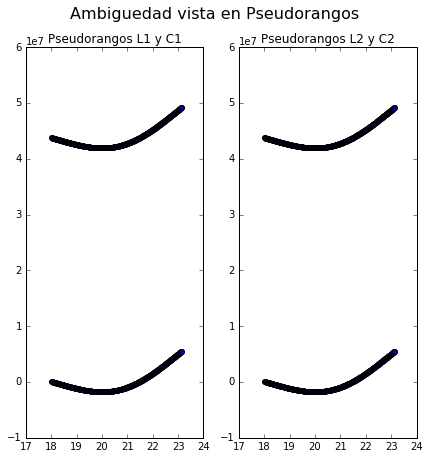

In [9]:
fig = plt.figure(figsize= (7,7))
fig.suptitle("Ambiguedad vista en Pseudorangos", fontsize=16)

ax1 = fig.add_subplot(121)
ax1.scatter(df.TIME/3600, df.L1)
ax1.scatter(df.TIME/3600, df.C1)

ax2 = fig.add_subplot(122)
ax2.scatter(df.TIME/3600, df.L2)
ax2.scatter(df.TIME/3600, df.C2)

ax1.title.set_text('Pseudorangos L1 y C1')
ax2.title.set_text('Pseudorangos L2 y C2')
plt.show()

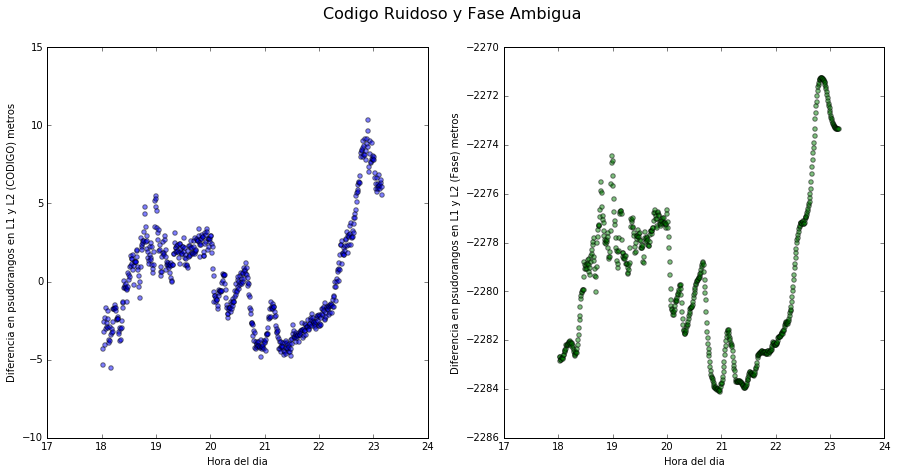

In [10]:
fig = plt.figure(figsize= (15,7))
fig.suptitle("Codigo Ruidoso y Fase Ambigua", fontsize=16)

plt.subplot(121)
plt.scatter(df.TIME/3600, df.C2 - df.C1, c = "blue", edgecolor='black', alpha = .5)
plt.xlabel("Hora del dia")
plt.ylabel("Diferencia en psudorangos en L1 y L2 (CODIGO) metros")
plt.subplot(122)
plt.scatter(df.TIME/3600, df.L1 - df.L2, c = "green", edgecolor='black', alpha = .5)
plt.xlabel("Hora del dia")
plt.ylabel("Diferencia en psudorangos en L1 y L2 (Fase) metros")
plt.show()

En la resta de observales del mismo tipo se aprecia la diferencia de escalas, debido a la ambiguedad. Aunque la señal es dispersa en ambos casos entre ciertas horas se puede ver que está más definida en la fase.

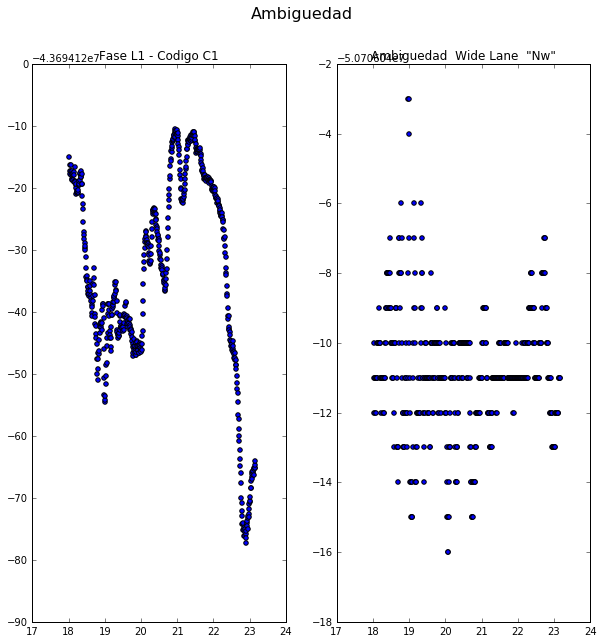

In [11]:
fig = plt.figure(figsize= (10,10))
fig.suptitle("Ambiguedad", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df.TIME/3600, df.L2 - df.C2)
ax2.scatter(df.TIME/3600, N_w)

ax1.title.set_text('Fase L1 - Codigo C1')
ax2.title.set_text('Ambiguedad  Wide Lane  "Nw"')
plt.show()

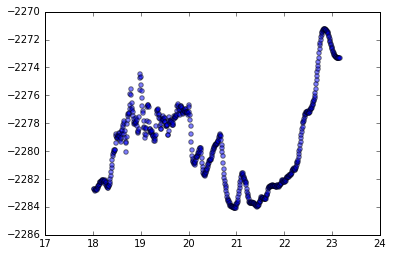

In [11]:
plt.scatter(df.TIME/3600, df.L1 - df.L2, c = "blue", edgecolor='black', alpha = .5)

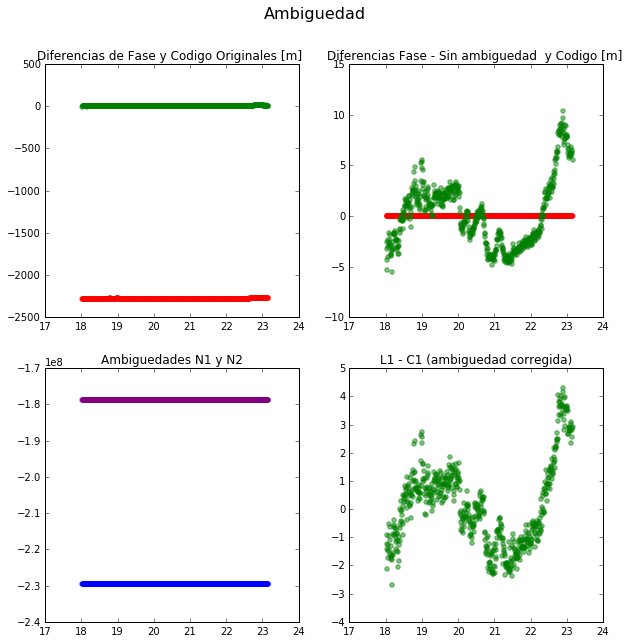

In [14]:
fig = plt.figure(figsize= (10,10))
fig.suptitle("Ambiguedad", fontsize=16)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df.TIME/3600, df.L1-df.L2, color = "r", alpha = .5 )
ax1.scatter(df.TIME/3600, df.C2-df.C1, color = "g", alpha = .5 )

ax2.scatter(df.TIME/3600, (df.L1 - N_1*lambda_1)-(df.L2- N_2*lambda_2), color = "r", alpha = .5 )
ax2.scatter(df.TIME/3600, df.C2 - df.C1, color = "g", alpha = .5 )

ax3.scatter(df.TIME/3600, N_1, color = "blue",alpha = .5, )
ax3.scatter(df.TIME/3600, N_2, color = "purple",alpha = .5)

ax4.scatter(df.TIME/3600, df.L1-(N_1*lambda_1) - df.C1, color = "green",alpha = .5, )

ax1.title.set_text('Diferencias de Fase y Codigo Originales [m] ')
ax2.title.set_text('Diferencias Fase - Sin ambiguedad  y Codigo [m] ')
ax3.title.set_text('Ambiguedades N1 y N2')
ax4.title.set_text('L1 - C1 (ambiguedad corregida)')
plt.show()

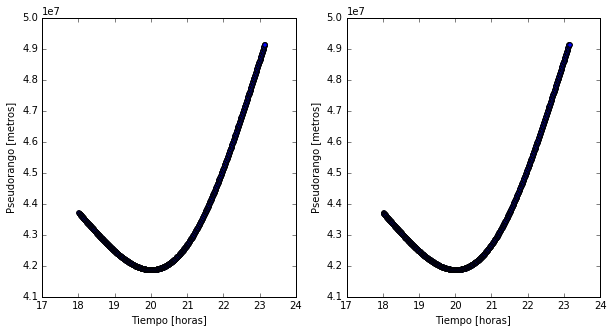

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(df.TIME/3600, df.C1)
#Descomentarear para ver la fase original
#plt.scatter(df.TIME/3600, df.L1, c= "purple")
plt.scatter(df.TIME/3600, df.L1-(N_1*lambda_1))
plt.xlabel("Tiempo [horas]")
plt.ylabel("Pseudorango [metros]")

plt.subplot(122)
plt.scatter(df.TIME/3600, df.C2)
#Descomentarear para ver la fase original
#plt.scatter(df.TIME, df.L2, c= "purple")
plt.scatter(df.TIME/3600, df.L2-(N_2*lambda_2))
plt.xlabel("Tiempo [horas]")
plt.ylabel("Pseudorango [metros]")

### Máxima discrepancia entre las nuevas medidas 

In [15]:
print "Diferencia en metros C1 - (L1-N1): ",np.max(np.abs(df.C1-(df.L1-(N_1*lambda_1))))
print "Diferencia en metros C1 - L1: ",np.max(np.abs(df.C1-(df.L1)))

Diferencia en metros C1 - (L1-N1):  4.30620670319
Diferencia en metros C1 - L1:  43696458.424


## Diferencia en pseudodiscancias obtenidas con fase:

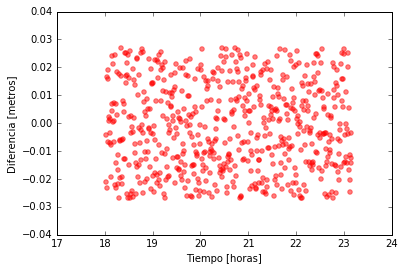

In [16]:
plt.scatter(df.TIME/3600, (df.L1 - N_1*lambda_1)-(df.L2- N_2*lambda_2), color = "r", alpha = .5 )
plt.xlabel("Tiempo [horas]")
plt.ylabel("Diferencia [metros]") 

# Eliminando ambiguedad con una sola frecuencia

Podemos estimar la ambiguedad de un tiempo de un receptor j a un satélite k de la siguiente manera 

$N_{1}^{jk} = [\frac{L_{1}^{jk} -P_{1}^{jk}}{\lambda_{1}}]redondear$  

En la frecuencia L1 por ejemplo.

La ambiguedad es constante entre cicle slips, se reduce incertidumbre promediando N entre el tiempo, pero se necesian 100 observaciones en el tiempo (epocas) para poder reducir el ruido a la mitad.


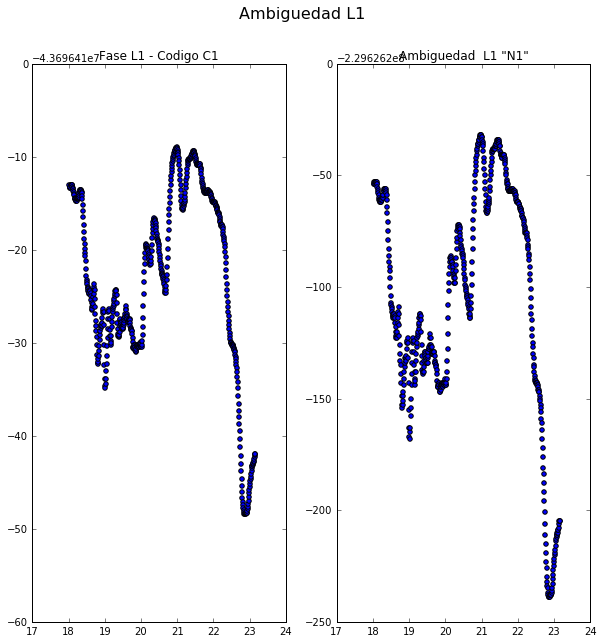

In [17]:
N1 = np.round_((df.L1 - df.C1).as_matrix()/ lambda_1)
fig = plt.figure(figsize= (10,10))
fig.suptitle("Ambiguedad L1", fontsize=16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(df.TIME/3600, df.L1 - df.C1)
ax2.scatter(df.TIME/3600, N1)

ax1.title.set_text('Fase L1 - Codigo C1')
ax2.title.set_text('Ambiguedad  L1 "N1"')

plt.show()

In [18]:
print "Arcos: ", np.unique(df.ARCS.values)
print df.shape
print df.shape
#df = df.head(10)
N1 = np.round_((df.L1 - df.C1).as_matrix()/ lambda_1)

Arcos:  [ 1.]
(617, 17)
(617, 17)


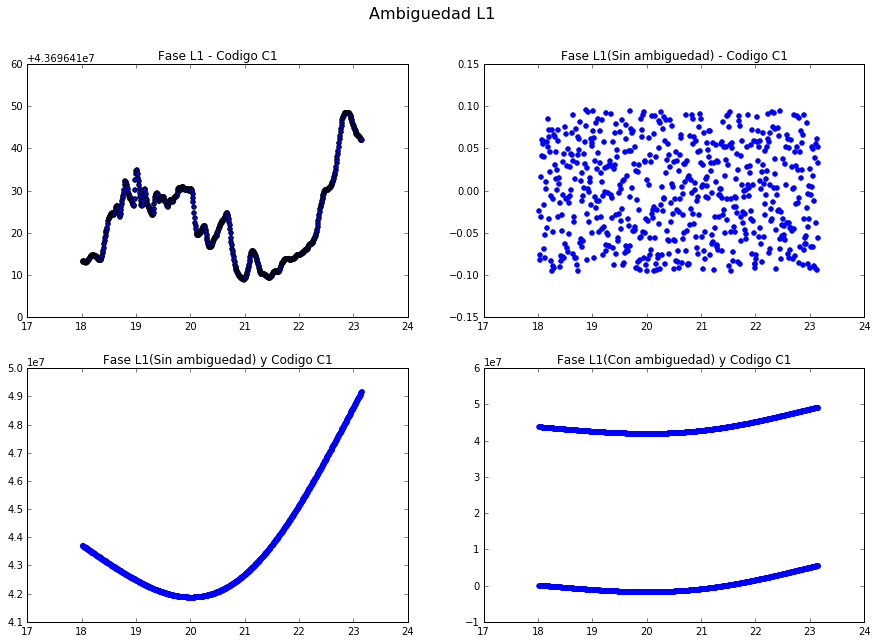

In [19]:
fig = plt.figure(figsize= ( 15,10))
fig.suptitle("Ambiguedad L1", fontsize=16)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df.TIME/3600, df.C1 - df.L1, c = "b")
#ax1.scatter(df.TIME/3600, N1, c= "g")

ax2.scatter(df.TIME/3600, df.L1 - N1*lambda_1 - df.C1, color = "b")

ax3.scatter(df.TIME/3600, df.L1 - N1*lambda_1, color = "b")
ax3.scatter(df.TIME/3600, df.C1, color = "b")

ax4.scatter(df.TIME/3600, df.L1, color = "b")
ax4.scatter(df.TIME/3600, df.C1, color = "b")


ax1.title.set_text('Fase L1 - Codigo C1')
ax2.title.set_text('Fase L1(Sin ambiguedad) - Codigo C1')
ax3.title.set_text('Fase L1(Sin ambiguedad) y Codigo C1')
ax4.title.set_text('Fase L1(Con ambiguedad) y Codigo C1')

plt.show()

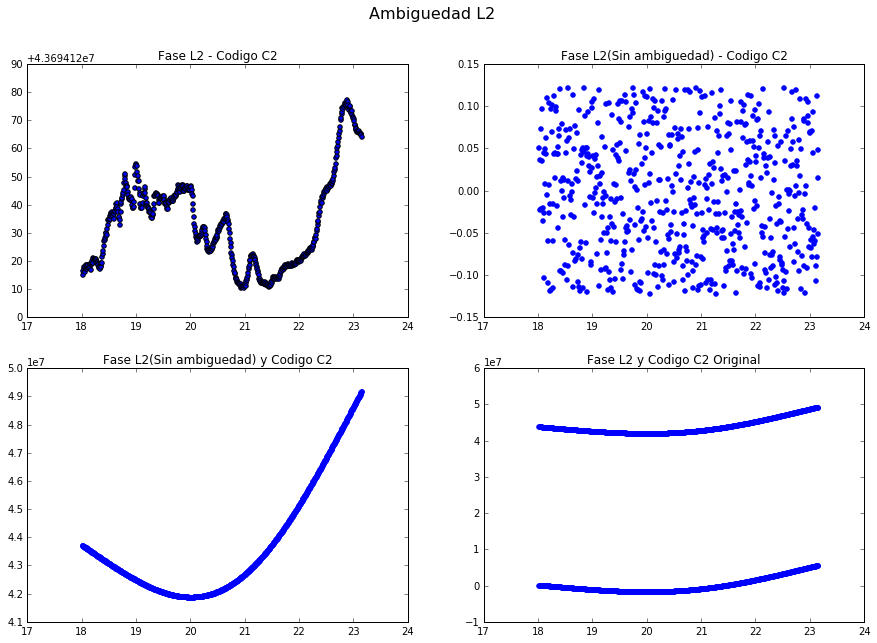

In [20]:
N2 = np.round_((df.L2 - df.C2).as_matrix()/ lambda_2)
fig = plt.figure(figsize= ( 15,10))
fig.suptitle("Ambiguedad L2", fontsize=16)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.scatter(df.TIME/3600, df.C2 - df.L2, c = "b")

ax2.scatter(df.TIME/3600, df.L2 - N2*lambda_2 - df.C2, color = "b")

ax3.scatter(df.TIME/3600, df.L2 - N2*lambda_2, color = "b")
ax3.scatter(df.TIME/3600, df.C2, color = "b")

ax4.scatter(df.TIME/3600, df.L2, color = "b")
ax4.scatter(df.TIME/3600, df.C2, color = "b")


ax1.title.set_text('Fase L2 - Codigo C2')
ax2.title.set_text('Fase L2(Sin ambiguedad) - Codigo C2')
ax3.title.set_text('Fase L2(Sin ambiguedad) y Codigo C2')
ax4.title.set_text('Fase L2 y Codigo C2 Original')

plt.show()

## Diferencia en pseudodiscancias obtenidas con frecuencias l1 y l2 por separado:

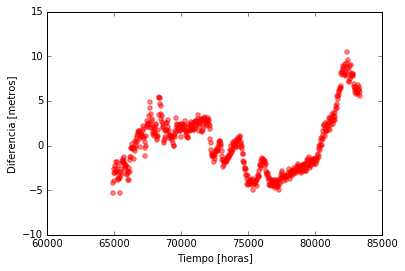

In [21]:
plt.scatter(df.TIME, (df.L2-N2*lambda_2)-(df.L1-N1*lambda_1), color = "r", alpha = .5 )
plt.xlabel("Tiempo [horas]")
plt.ylabel("Diferencia [metros]")

<h1>Resolución de la ambiguedad</h1>

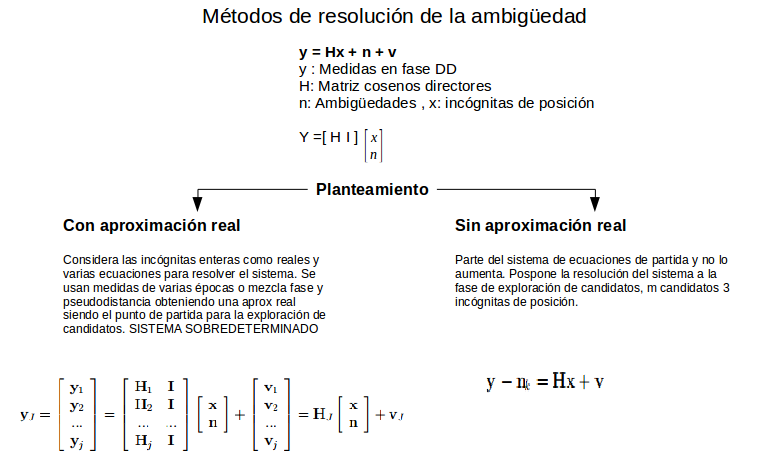

In [70]:
Image(filename='Seleccion_102.png')

## Diferencias Dobles

Se necesitan dos receptores y dos satelites.
 
$B_{rec}^{sat} = \lambda N_{rec}^{sat} + b_{rec}+ b^{sat}$  

N es entero, los otros términos no pero son identicos para instrumentos en común.

B es la ambiguedad, al hacer diferencias dobles se cancela la parte fraccional de las ambiguedades b_rec u b_sat, y nos queda el **numero entero de longitudes de onda**.

$	\bigtriangleup\bigtriangledown B_{rec1}^{sat1} = B_{rec1}^{sat1} - B_{rec2}^{sat1} - (B_{rec1}^{sat2} - B_{rec2}^{sat2}) = \lambda \bigtriangleup\bigtriangledown N_{rec1}^{sat1}$

**EJERCICIO**:Usaremos esta fórmula con la combinación Melbourne Wübena.

In [23]:
def WN(df, times):
    """Returns wide Phase, narrow Code"""
    df = df[df.TIME.isin(times)]
    df["Carrier_w"] = ((f1*df.L1)-(f2*df.L2))/(f1-f2)
    df["Codigo_n"] = ((f1*df.C1)+(f2*df.C2))/(f1+f2)
    df["Nw"] = np.round
    return df

In [24]:
rec1 = pd.read_csv("zob1324.03.txt")
rec2 = pd.read_csv("garf324.03.txt")
columns = ['PRN', 'TIME', 'C1', 'C2', 'L1', 'L2', 'Tgd', 'IPPx',
       'IPPy', 'IPPz', 'LLI_1', 'LLI_2', 'Elevation', 'Azimuth', 'Lat',
       'Lon']
rec1.columns, rec2.columns = columns, columns

rec1 = adjust_times(rec1)
rec2 = adjust_times(rec2)

#Debe tener ambos observables
rec1 = rec1[(rec1.L1.isnull() == False)& (rec1.L2.isnull() == False)]
rec2 = rec2[(rec2.L1.isnull() == False)& (rec2.L2.isnull() == False)]

rec1_sat1 = rec1[rec1.PRN == "GPS 8"]
rec1_sat2 = rec1[rec1.PRN == "GPS 27"]
rec2_sat1 = rec2[rec2.PRN == "GPS 8"]
rec2_sat2 = rec2[rec2.PRN == "GPS 27"]


#tomar tiempos que toman ambos receptores
times_in_both = reduce(np.intersect1d,(rec1_sat1.TIME.as_matrix(),rec1_sat2.TIME.as_matrix(), rec2_sat1.TIME.as_matrix(), rec2_sat2.TIME.as_matrix()))

rec1_sat1 = WN(rec1_sat1, times_in_both)
rec1_sat2 = WN(rec1_sat2, times_in_both)
rec2_sat1 = WN(rec2_sat1, times_in_both)
rec2_sat2 = WN(rec2_sat2, times_in_both)

#2 recv 2 sats

DD_Carrier_w = rec1_sat1.Carrier_w.as_matrix() - rec2_sat1.Carrier_w.as_matrix() - (rec1_sat2.Carrier_w.as_matrix() - rec2_sat2.Carrier_w.as_matrix() )
DD_Codigo_n = rec1_sat1.Codigo_n.as_matrix() - rec2_sat1.Codigo_n.as_matrix() - (rec1_sat2.Codigo_n.as_matrix() - rec2_sat2.Codigo_n.as_matrix())

N_w = np.round_((DD_Carrier_w - DD_Codigo_n)/ lambda_w)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

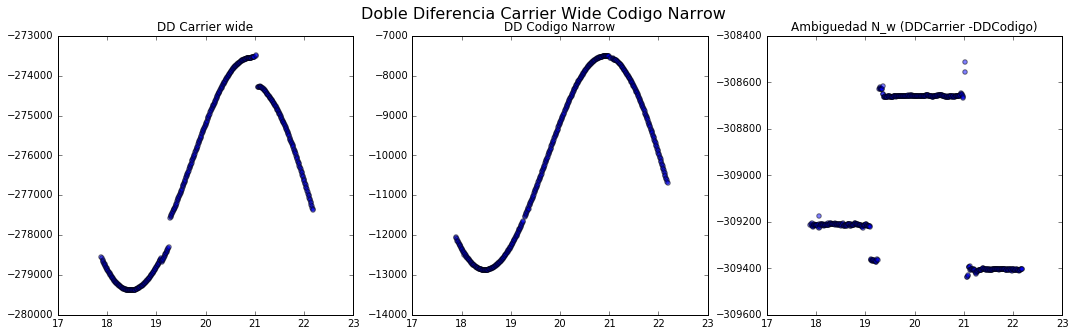

In [25]:
fig = plt.figure(figsize= (18,5))
fig.suptitle("Doble Diferencia Carrier Wide Codigo Narrow", fontsize=16)
ax1 = fig.add_subplot(131)
ax1.scatter(rec1_sat1.TIME/3600, DD_Carrier_w, c = "blue", edgecolor='black', alpha = .5)
ax2 = fig.add_subplot(132)
ax2.scatter(rec1_sat1.TIME/3600, DD_Codigo_n, c = "blue", edgecolor='black', alpha = .5)
ax3 = fig.add_subplot(133)
ax3.scatter(rec1_sat1.TIME/3600, N_w, c = "blue", edgecolor='black', alpha = .5)
ax1.title.set_text('DD Carrier wide')
ax2.title.set_text('DD Codigo Narrow')
ax3.title.set_text('Ambiguedad N_w (DDCarrier -DDCodigo)')
plt.show()

**TAREA:**Se puede inferir por la gráfica que uno o ls dos receptores tienen cycle slips cerca de las 19.5, y 21 horas. Verificar con cada receptor graficando diferencia de fase y la ambiguedad de melbourne Wubena. 

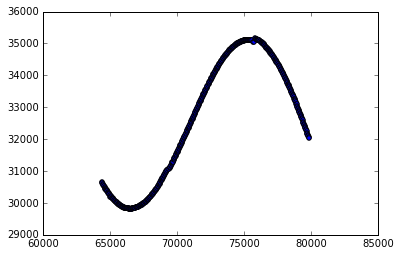

In [26]:
test = DD_Carrier_w-N_w
plt.scatter(rec1_sat1.TIME, test)

### Bibliografía

- Libro GNSS Data processing Vol 1. ESA. 

- Definición de señales
http://www.navipedia.net/index.php/Combining_pairs_of_signals_and_clock_definition

- RTK http://www.navipedia.net/index.php/RTK_Fundamentals

- PPP http://www.navipedia.net/index.php/Linear_observation_model_for_PPP

- Combinacion melbourne wubbena(MW) para detectar cycle slips
http://www.navipedia.net/index.php/Detector_based_in_code_and_carrier_phase_data:_The_Melbourne-W%C3%BCbbena_combination


- Resolver ambiguedad Dole Frecuencia
http://www.navipedia.net/index.php/Carrier_phase_ambiguity_fixing_with_two_frequencies
http://www.navipedia.net/index.php/Carrier_Phase_Ambiguity_Fixing

- http://www.insidegnss.com/node/2146

- http://www.insidegnss.com/node/4368

- http://www.trimble.com/gps_tutorial/sub_phases.aspx